# Masinõpe. Scikit-Learn ja TensorFlow.

<div style="float: left;">Valter Kiisk<br><span style="font-size: 75%;">TÜ Füüsika Instituut</span></div><div style="float: right;">Viimati muudetud: 21.01.2022</div>
<div style="display:none">
$\renewcommand{\vec}[1]{{\bf #1}}$
$\newcommand{\aver}[1]{\langle #1 \rangle}$
$\newcommand{\eps}{\varepsilon}$
</div>

<h1>Sisukord<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sissejuhatus" data-toc-modified-id="Sissejuhatus-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sissejuhatus</a></span></li><li><span><a href="#Regressioon-(Scikit-Learn)" data-toc-modified-id="Regressioon-(Scikit-Learn)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Regressioon (Scikit-Learn)</a></span><ul class="toc-item"><li><span><a href="#Lineaarne-regressioon" data-toc-modified-id="Lineaarne-regressioon-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Lineaarne regressioon</a></span></li><li><span><a href="#Polünomiaalne-regressioon" data-toc-modified-id="Polünomiaalne-regressioon-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Polünomiaalne regressioon</a></span></li><li><span><a href="#Neuronvõrk" data-toc-modified-id="Neuronvõrk-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Neuronvõrk</a></span></li></ul></li><li><span><a href="#Regressioon-(TensorFlow)" data-toc-modified-id="Regressioon-(TensorFlow)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Regressioon (TensorFlow)</a></span><ul class="toc-item"><li><span><a href="#Lineaarne-regressioon" data-toc-modified-id="Lineaarne-regressioon-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Lineaarne regressioon</a></span></li><li><span><a href="#Neuronvõrk" data-toc-modified-id="Neuronvõrk-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Neuronvõrk</a></span></li></ul></li><li><span><a href="#Klassifitseerimine-(Scikit-Learn)" data-toc-modified-id="Klassifitseerimine-(Scikit-Learn)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Klassifitseerimine (Scikit-Learn)</a></span><ul class="toc-item"><li><span><a href="#k-lähima-naabri-algoritm" data-toc-modified-id="k-lähima-naabri-algoritm-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>k-lähima naabri algoritm</a></span></li><li><span><a href="#Tugivektormasin" data-toc-modified-id="Tugivektormasin-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Tugivektormasin</a></span></li><li><span><a href="#Neuronvõrk" data-toc-modified-id="Neuronvõrk-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Neuronvõrk</a></span></li></ul></li><li><span><a href="#Pildituvastus" data-toc-modified-id="Pildituvastus-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Pildituvastus</a></span></li></ul></div>

## Sissejuhatus

Masinõpe tegeleb matemaatiliste (statistiliste) mudelitega, mida on võimalik treenida empiiriliste andmetega nii, et need mudelid suudavad teha piisavalt täpseid ennustusi või otsuseid ka sama tüüpi uute andmete korral. Masinõppe valdkondi võib klassifitseerida järgmiselt:

- Juhendatud õpe
    - regressioon
    - klassifitseerimine
- Juhendamata õpe
    - klasteranalüüs
    - dimensionaalsuse vähendamine
- Stiimulõpe

Objekti iseloomustab komplekt mõõdetavaid tunnuseid (*features*) ehk seletavaid muutujaid (*explanatory variables*). Need on masinõppe mudelile sisendiks. Juhendatud õppe korral lisandub ka väljundsuurus ehk märgend (*label*, *target*), mis regressiooni korral on pidev ehk reaalarvuline ja klassifitseerimise korral diskreetne ehk kategoriaalne. Viimasel juhul võib märgendit nimetada klassiks. Üks vaatlus ehk näidis ehk andmepunkt (*sample*) sisaldab tunnuste komplekti koos vastava märgendiga.

Seega juhendatud õppe korral peab masin õppima ennustama väljundit suvalise sisendi jaoks, tuginedes (inimese poolt) eelnevalt märgendatud treeningandmetele. Seevastu juhendamata õppe korral märgendid puuduvad ja algoritm ise peab tuvastama andmestikus leiduvad (varjatud) struktuurid, nt mitu erinevat objektitüüpi esineb või kui palju on tunnuste hulgas sõltumatuid muutujaid. 

Et masinõppe mudel oleks õppimisvõimeline, sisaldab see vabu parameetreid, mida optimeeritakse treenimise käigus, püüdes minimeerida mõnesugust sihi- või kahjufunktsiooni (*objective function*, *loss function*). Samas võib mudeli või treenimisalgoritmi koosseisus olla ka nn hüperparameetreid, mis fikseeritakse enne treeningu algust ja mis mõjutavad õppe tulemust või kiirust.

Selles märkmeraamatus vaatame vaid juhendatud õpet. Sissejuhatava näitena vaatame sellist regressioonülesannet, kus on üksainus seletav muutuja $x$, mis määrab mõnesuguse tundmatu seose kaudu sõltuva muutuja $y$ väärtuse. See on piisavalt lihtne ülesanne, kus me masinõppe-spetsiifilisi Pythoni pakette veel ei vaja ja võime piirduda `Numpy` vahenditega. Impordime vajalikud vahendid:

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
from numpy import sqrt, exp, linspace, meshgrid, polyfit, polyval
from numpy.random import randn, seed
from matplotlib.pyplot import *

In [370]:
style.use({
    'figure.dpi': 120,
    'lines.markersize': 5
})

Genereerime juhuslikud "katseandmed". Tegelikkuses andmed pärineksid tõenäoliselt mõnesugustest mõõtmistest.

<IPython.core.display.Javascript object>


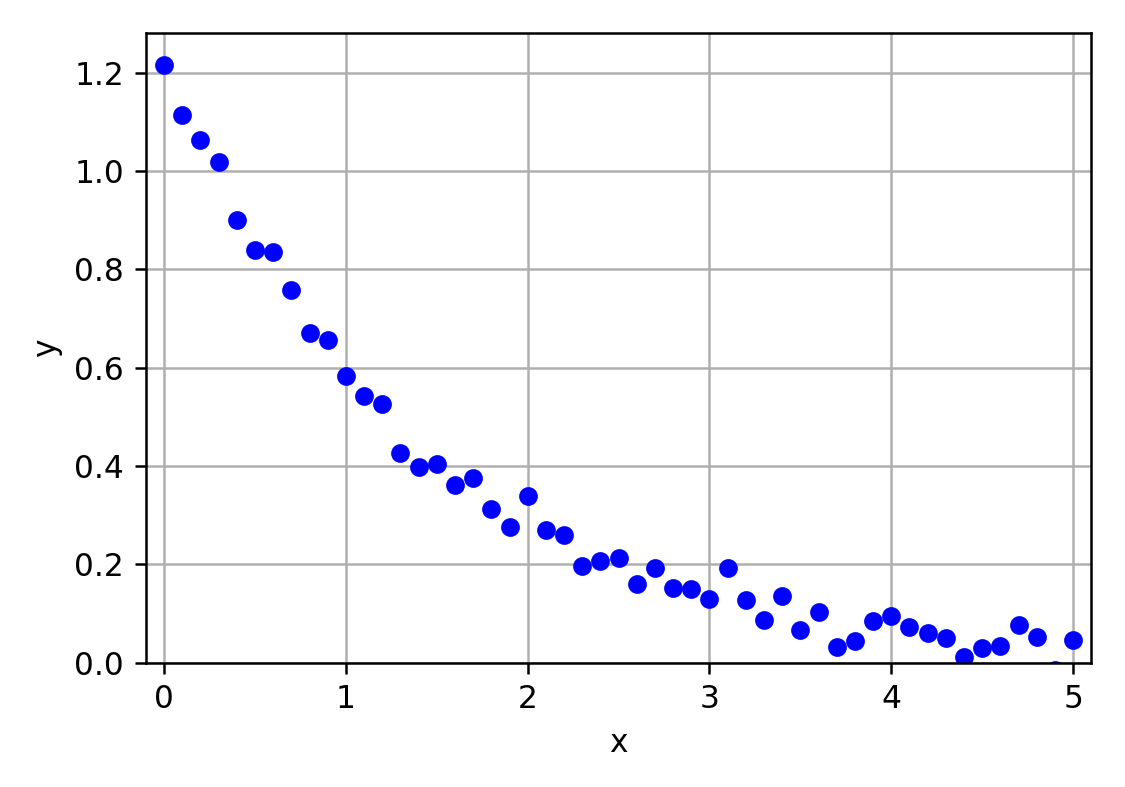

In [371]:
# lähtestame juhuslike arvude generaatori kindlasse algseisu,
# et vajadusel saaks reprodutseerida sama andmeseeria
seed(42)
n_samples = 51
x_all = linspace(0, 5, n_samples)
y_all = 1.2 * exp(-0.7 * x_all) + 0.03 * randn(n_samples)

figure(figsize=(5, 3.5))
plot(x_all, y_all, 'bo')
xlim(-0.1, 5.1)
ylim(0, 1.28)
xlabel('x')
ylabel('y')
grid()
tight_layout()
show()

Niisiis meie eesmärk on õpetada arvutile seos $x$ ja $y$ vahel, nii et etteantud $x$ väärtuse korral saaks mõnesuguse täpsusega ennustada $y$ väärtust. Seejuures tegelikku seost $x$ ja $y$ vahel me ei tea. Üks parajalt üldine ja paindlik matemaatiline funktsioon on polünoom: $$y=a_0x^n+a_1x^{n-1}+\ldots+a_{n-1}x+a_n.$$ Selle mudeli treenimine tähendab siis kordajate $a_i$ leidmist, nii et funktsioon kulgeks võimalikult katsepunktide lähedalt. Konkreetsemalt, võtame kahjufunktsiooniks ruutkeskmise erinevuse katselise $y$-väärtuse ja mudelfuktsiooni vastava ennustuse vahel. Vähimruutude meetodil polünoomi sobitamist teostabki `numpy.polyfit`.

Masinõppe korral on oluline, et treenitud mudel annaks adekvaatseid prognoose ka uute andmete korral, mida treenimise ajal ei kasutatud. Seega andmemassiivist mingi osa tuleb jätta hilisemaks testimiseks. Jätame näiteks pooled andmed mudeli treenimiseks ja ülejäänud testimiseks. 

Esialgu me ei tea ka seda, milline võiks olla mõistlik polünoomi järk $n$. Viimane on seega mudeli hüperparameeter. Katsetame erinevate $n$ väärtustega. Mudeli sobivust kontrollime nii treening- kui ka testandmete peal, kasutades mõlemal juhul karakteristikuna ruutkeskmist viga.

In [374]:
x_train, x_test = x_all[0::2], x_all[1::2]
y_train, y_test = y_all[0::2], y_all[1::2]

mse = lambda u: sqrt((u**2).mean())

print('%5s %11s %8s' % ('n', 'Treening', 'Test'))
for n in range(1, 15):
    p = polyfit(x_train, y_train, n)
    print('%5d %11.4f %8.4f' % (
        n,
        mse(y_train - polyval(p, x_train)),
        mse(y_test - polyval(p, x_test))))

    n    Treening     Test
    1      0.1441   0.1318
    2      0.0481   0.0488
    3      0.0256   0.0295
    4      0.0232   0.0289
    5      0.0228   0.0288
    6      0.0228   0.0288
    7      0.0225   0.0292
    8      0.0225   0.0294
    9      0.0206   0.0329
   10      0.0206   0.0328
   11      0.0202   0.0331
   12      0.0190   0.0354
   13      0.0186   0.0376
   14      0.0184   0.0343


Treeningandmete puhul funktsioon sobitub seda paremini, mida suurem on $n$, sest $n$ suurendamise teel on alati võimalik mudeli õppimisvõimet suurendada (ehk polünoomi aina täpsemalt antud katsepunktidest läbi juhtida). Esialgu ennustused paranevad ka testandmete jaoks kuni umbes $n=5$ juures hakkab ennustuste kvaliteet langema. Veel suuremate $n$ väärtuste kasutamine ei ole õigustatud ja tingib ületreeningu. Vaatame, kuidas variandid $n=1$ (liiga lihtne mudel), $n=5$ (optimaalne) ja $n=15$ (ületreening) graafiliselt välja näevad:

<IPython.core.display.Javascript object>


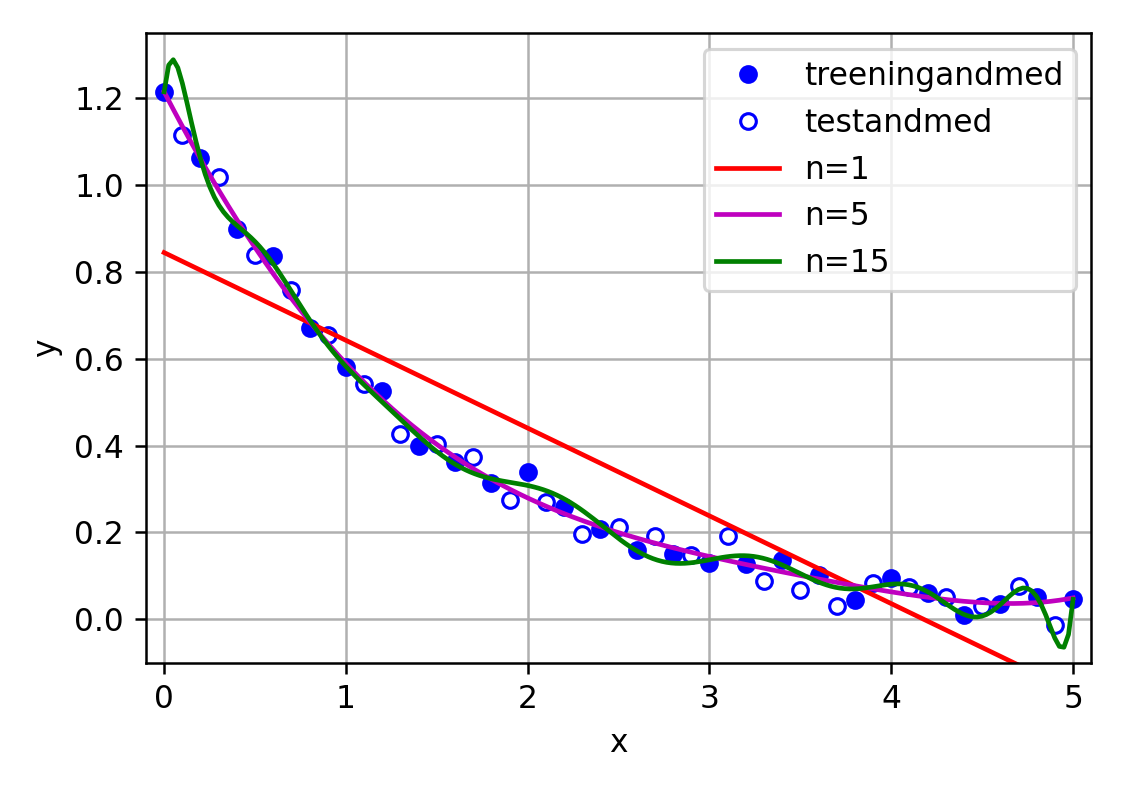

In [373]:
figure(figsize=(5, 3.5))
plot(x_train, y_train, 'bo', label='treeningandmed')
plot(x_test, y_test, 'bo', mfc='w', label='testandmed')

ξ = linspace(0, 5, 200)
for n, c in zip((1, 5, 15), ('r', 'm', 'g')):
    p = polyfit(x_train, y_train, n)
    plot(ξ, polyval(p, ξ), ls='-', color=c, label='n=%d' % n)

xlim(-0.1, 5.1)
ylim(-0.1, 1.35)
xlabel('x')
ylabel('y')
grid()
legend()
tight_layout()
show()

Nendest kolmest variandist $n=5$ on ilmselt kõige loomulikuma käitumisega ja sobivalt üldistub andmetele. Samas, kui me katsetaks näiteks mudeliga
$$y=a_1e^{-k_1x} + a_2e^{-k_2x} + \ldots + a_ne^{-k_nx},$$ saaks tulemus veelgi parem.

Selles näites iseloomustas vaatlust üksainus tunnus, nii et kõik vaatlused sai esitada vektorina. Kui tunnuseid on rohkem, esitatakse andmed maatriksina $\vec X$, mille iga rida vastab ühele vaatlusele ja iga veerg ühele kindlale tunnusele. Märgendid tuleb samas järjestuses koondada vektorisse $\vec y$.
$$\vec X=\stackrel{\Tiny\text{tunnused}\rightarrow}{\begin{bmatrix}x_{11} & x_{12} & \cdots & x_{1n}\\ x_{21} & x_{22} & \cdots & x_{2n}\\ \vdots & \vdots & \ddots & \vdots\\
x_{m1} & x_{m2} & \cdots & x_{mn}\end{bmatrix}}
{\Tiny \begin{matrix}\text{vaatlused} \\ \downarrow\end{matrix}}
\qquad \vec y=\begin{bmatrix}y_1\\y_2\\ \vdots \\ y_m\end{bmatrix}.$$
Näiteks Numpy andmestruktuure kasutades võiks maatriksit $\vec X$ esindada kahemõõtmeline massiiv, kus vaatlused kulgevad 1. telje sihis ja tunnused 2. telje sihis.

## Regressioon (Scikit-Learn)

[Scikit-Learn](https://scikit-learn.org/stable/) (`sklearn`) on üks vanimaid ja võrdlemisi üldotstarbeline Pythoni masinõppe teek. See sisaldab suure hulga lihtsasti kasutatavaid (valmiskujul) vahendeid ja algoritme, mis on koondatud vastavatesse klassidesse ja moodulitesse.

Reeglina masinõppeprobleemides tunnuseid/seletavaid muutujaid on rohkem kui üks. Et saaks regressiooni tulemust siiski veel graafiliselt esitada, piirdume kahe tunnusega. Simuleerime jälle andmed:

In [46]:
from sklearn.utils import check_random_state

def make_regr(hidden_layers, n_samples, n_features, activation=np.tanh, random_state=None):
    rnd = check_random_state(random_state)
    features = rnd.randn(n_samples, n_features)
    n_inputs = n_features
    X = features
    for n_outputs in hidden_layers:
        W = rnd.randn(n_inputs, n_outputs)
        b = rnd.randn(n_outputs)
        X = activation(X.dot(W) + b)
        n_inputs = n_outputs
    w = rnd.randn(n_inputs)
    b = rnd.normal()
    target = X.dot(w)+b
    return features, target

n_samples = 2000
n_features = 2

X_all, y_all = make_regr((5,5,5), n_samples=n_samples, n_features=n_features, random_state=1)
X_all *= (3, 15)
X_all += (5, 25)

3D graafikute tegemiseks on tarvis veel mõningaid vahendeid:

<IPython.core.display.Javascript object>


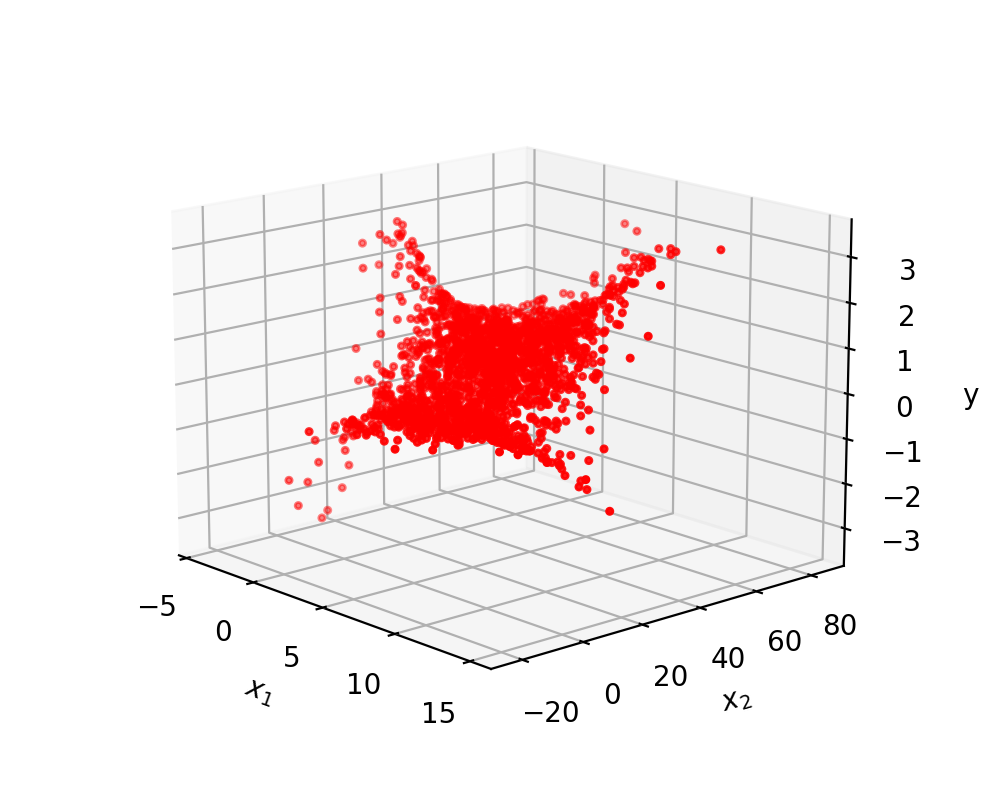

In [47]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def create_surface(f, x_min, x_max, y_min, y_max, resol=20):
    x = linspace(x_min, x_max, resol)
    y = linspace(y_min, y_max, resol)
    xx, yy = meshgrid(x, y)
    pairs = np.c_[np.ravel(xx), np.ravel(yy)]
    zz = f(pairs).reshape(xx.shape)
    return xx, yy, zz

def plot_3d(X, y, surface=None, view=None):
    fig = figure(figsize=(5,4))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(X[:,0], X[:,1], y, marker='.', color='r')
    if surface is not None:
        ax.plot_surface(*surface, cmap=cm.rainbow, alpha=0.5, linewidth=0.25, edgecolors='black')
    
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('y')
    if view is not None:
        ax.view_init(*view)
    tight_layout()
    show()

plot_3d(X_all, y_all, view=(15, -42))

Seekord andmete tükeldamise treening- ja testandmeteks teostame Scikit-Learn funktsiooniga `train_test_split`. Vastava proportsiooni saab seada parameetriga `train_size` või `test_size`. Vaikimisi andmete järjestus eelnevalt randomiseeritakse (`shuffle=True`), mis on antud juhul ka õigustatud.

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size=0.7, random_state=1)

### Lineaarne regressioon

Lineaarse regressiooni korral sõltuva muutuja väärtus $y$ tunnusvektori $\vec x=(x_1,x_2,\ldots,x_n)$ jaoks prognoositakse mudeliga
$$y=f(\vec x)=\vec w\vec x + b=\sum_i w_i x_i+b.$$
Vabad parameetrid on kordajad $\vec w=(w_1,w_2,\ldots,w_n)$, mis näitavad, millise kaaluga iga tunnust arvesse võtta, ja vabaliige $b$.

Regressiooni korral on sihifunktsiooniks (mille miinimumi otsitakse) harilikult ruutkeskmine hälve andmepunktide ja mudeli vastavate ennustuste vahel. Teatavasti sellisel juhul lineaarne regressioonülesanne taandub lineaarseks võrrandisüsteemiks, mis lahendub otsese algoritmiga. Seega lineaarse regressiooni teostamine on äärmiselt kiire ja annab ühese lahendi.

Teegis `sklearn` iga mudelit esindab vastav klass (näiteks `LinearRegression`). Selliste klasside koosseisus on rida standardsete nimedega meetodeid. Meetod `fit` treenib mudeli etteantud andmete peal. Kui mudel on treenitud, siis meetod `predict` ennustab tulemust etteantud tunnustemassiivi jaoks. Meetod `score` arvutab mõnesuguse statistiku, mis väljendab mudeli ennustuste täpsust. Sõltuvalt ülesandest ja mudelist, võib viimast arvutada mitmel viisil. Lineaarse regressiooni korral `score` arvutab variatsioonikordaja    ([coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)):
$$R^2=1-\frac{\sum_i [y_i-f(\vec{x}_i)]^2}{\sum_i (y_i-\bar{y})^2},$$
kus summad on üle kõigi andmepunktide. $R^2$ väljendab seda, kui suurt osa signaali varieeruvusest suudab antud mudel kirjeldada. Ideaalselt sobituva mudeli korral $R^2=1$. Teises äärmuses, kui mudeliks oleks lihtsalt konstantne funktsioon (ühe vaba parameetriga), oleks $R^2=0$. Antud andmed on spetsiaalselt disainitud mittelineaarseina, seega lineaarne regressioon hästi ei sobitu:

In [49]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept = True)
model.fit(X_train, y_train)

print('Treeningandmed: R^2 = %.3f' % model.score(X_train, y_train))
print('Testandmed: R^2 = %.3f' % model.score(X_test, y_test))

Treeningandmed: R^2 = 0.638
Testandmed: R^2 = 0.629


$R^2$ on seotud ruutkeskmise veaga. On mõeldav, et praktikas pakub huvi mingi muu kvantiteet, mis on küll heas korrelatsioonis, aga mitte identne ruutkeskmise hälbega, nt keskmine absoluutne viga või keskmine suhteline viga. Neid võib Numpy massiivide baasil arvutada käsitsi, või kasutada sobivat funktsiooni moodulist `sklearn.metrics`:

In [50]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_test)
print('Keskmine absoluutne viga = %.3f' % mean_absolute_error(y_test, y_pred))

Keskmine absoluutne viga = 0.280


Ootuspäraselt lineaarne mudel kirjeldab tasandit ruumis:

<IPython.core.display.Javascript object>


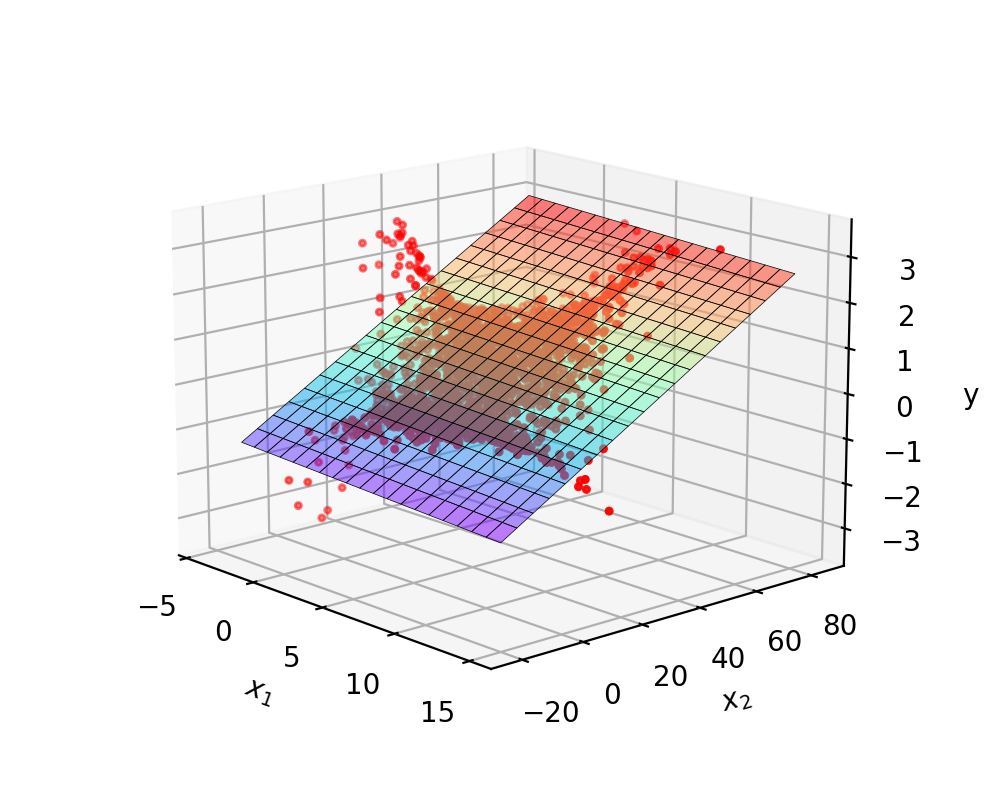

In [54]:
surface = create_surface(model.predict, -3, 15, -20, 80)
plot_3d(X_all, y_all, surface, view=(15, -42))

Objekti `model` atribuutide kaudu saab vajadusel (näiteks, et treenitud mudel üle kanda teise arvutuskeskkonda) teada ka optimeeritud mudeli parameetrite väärtused:

In [55]:
print('Koefitsiendid =', model.coef_, '\nVabaliige =', model.intercept_)

Koefitsiendid = [-0.01919682  0.04219291] 
Vabaliige = -0.4049705750735805


Mitmete masinõppealgoritmide puhul on vajalik, et tunnused oleks normeeritud, st keskväärtused oleks nulli lähedal ja mastaap suurusjärgus 1. Spetsiifilistel juhtudel on mõeldavad ka mittelineaarsed teisendused, et sõltuvust lineariseerida. `StandardScaler` nihutab tunnuste keskväärtuse nulli ja jagab standardhälbega. Kõigil seda laadi objektidel (moodulist `sklearn.preprocessing`) on kaks põhimeetodit: `fit` ja `transform`. Esimene sobitab ja jätab meelde teisenduse parameetrid (antud juhul keskväärtuse ja standardhälbe) ning teine rakendab teisenduse. `fit_transform` on sama mis funktsioonide `fit` ja `transform` kasutamine üksteise järel. Vajadusel, kui on tarvis taastada andmeid algkujul, on olemas ka `inverse_transform`.

<IPython.core.display.Javascript object>


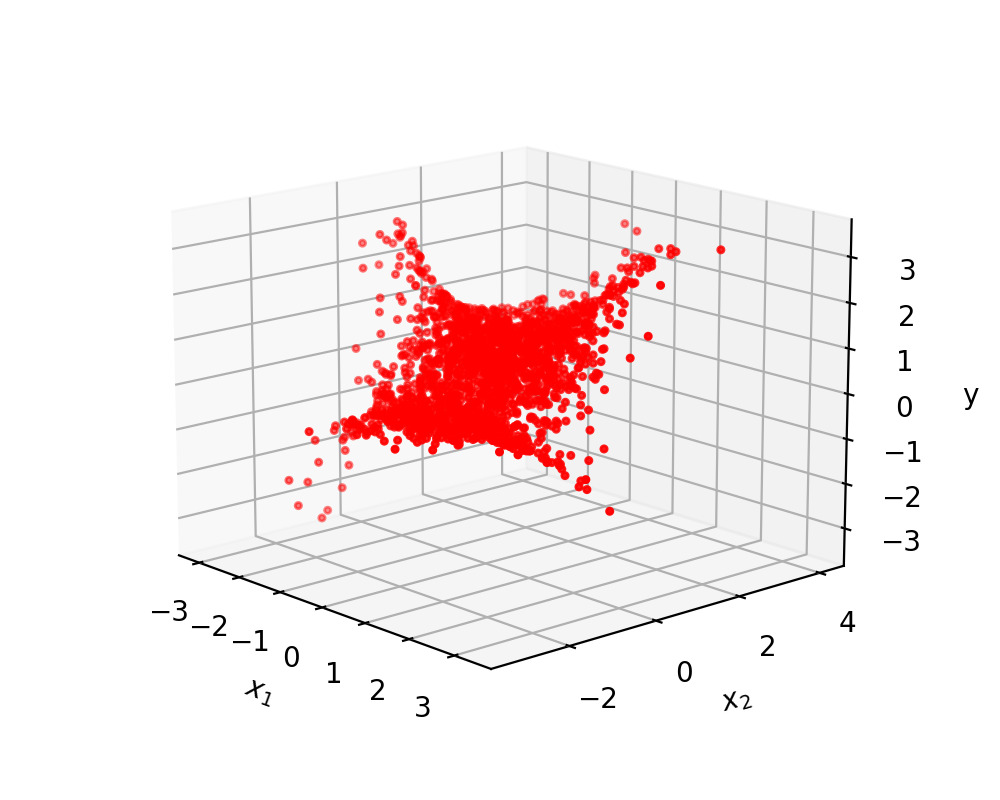

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)
X_all_norm = scaler.transform(X_all)

plot_3d(X_all_norm, y_all, view=(15, -42))

### Polünomiaalne regressioon

Mittelineaarse regressiooni saab kergesti sel teel, kui lihtsalt laiendada tunnuste komplekti, lisades kõikvõimalikud astmed ja korrutised (kuni teatud järguni), ja endiselt rakendada lineaarset regressiooni.

In [60]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=3, include_bias=False)
X_poly_train = pf.fit_transform(X_train_norm)
X_poly_test = pf.transform(X_test_norm)

model = LinearRegression(fit_intercept = True)
model.fit(X_poly_train, y_train)

print('Treeningandmed: R^2 = %.3f' % model.score(X_poly_train, y_train))
print('Testandmed: R^2 = %.3f' % model.score(X_poly_test, y_test))

Treeningandmed: R^2 = 0.844
Testandmed: R^2 = 0.758


Nagu näha, hakkab variatsioonikordaja nüüd juba lähenema ühele. Saadud mudel kirjeldab võrdlemisi sujuvat kõverpinda, mis on end veidi vorminud andmepunktide järgi:

<IPython.core.display.Javascript object>


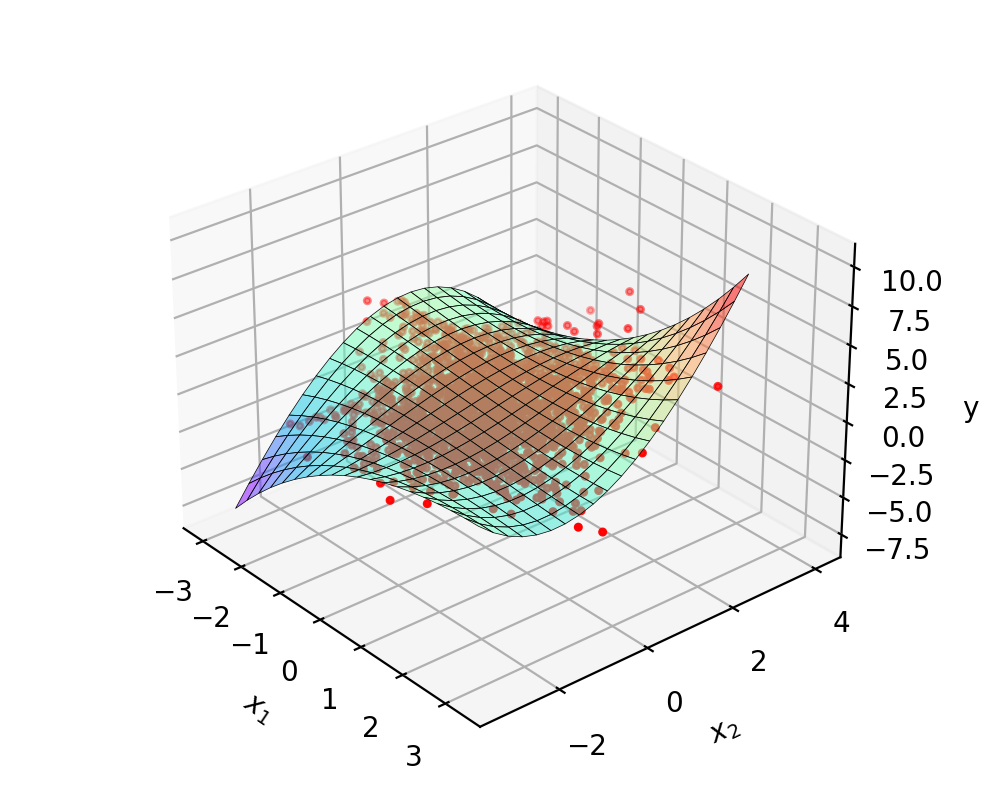

In [61]:
surface = create_surface(lambda ξ: model.predict(pf.transform(ξ)), -3, 3, -3, 3)
plot_3d(X_all_norm, y_all, surface, view=(17, -58))

Sellise võttega ei saa siiski eriti keerulisi mudeleid luua, sest mudeli treenimiseks vajalike andmete arv kasvab eksponentsiaalselt polünoomi järguga (vt [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality)). Nagu veendusime juba töölehe alguses, vähesel hulgal andmetel treenitud kõrget järku polünoom hakkab ebaloomulikult ostsilleerima, st tekib ületreening.

### Neuronvõrk

Tehisnärvivõrk simuleerib mingil määral bioloogilise aju toimimist. Bioloogilise neuroni analoogiks on pertseptron, mis võtab sisse teatud hulga sisendsignaale $x_i$ ja annab välja ühe väljundsignaali vastavalt mudelile
$$y=f\left(\sum_i w_i x_i+b\right),$$
kus kaalud $w_i$ ja vabaliige $b$ on vabad parameetrid ning $f$ on teatav aktivatsioonifunktsioon. Viimane on mittelineaarne ja simuleerib neuroni aktiveerumist sisendsignaalide teatud kombinatsioonide korral. Sellised neuronid võib ühendada kihiti, kus ühe kihi väljundid on sisendeiks järgmise kihi kõigile neuroneile.

Kuna igal neuronil on oma komplekt vabu parameetreid, siis suurel neuronvõrgul on potentsiaalselt väga suur õppimisvõime. Treenimiseks kasutatakse mitmesuguseid [stohhastilisel gradientlaskumisel](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) põhinevaid algoritme, kuhu on kaasatud ka inerts ja adaptiivne õpisamm. Selliste algoritmide tuntud esindaja on [Adam](https://arxiv.org/pdf/1412.6980.pdf).

Täissidusat pärilevi neuronvõrku esindab `sklearn.neural_network.MLPRegressor`. See klass teeb kogu sisulise/tehnilise töö neuronvõrgu konstrueerimisel ja treenimisel. Neuronvõrgu ehituse määravad neuronite arvud peidetud kihtides (`hidden_layer_sizes`) ning aktivatsioonifunktsiooni valik. Treenimist saab mõjutada mõnede hüperparameetritega (sh õpisamm `learning_rate_init`), miniplokkide suurusega (`batch_size`) ja iteratsioonide arvuga (`max_iter`). Parameeter `warm_start=True` annab mõista, et korduval väljakutsel `model.fit` jätkab treenimist (mitte ei alusta otsast peale).

In [97]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(7,4),
                     activation='tanh', solver='adam', learning_rate_init=0.0005,
                     batch_size=32, alpha=0, max_iter = 500,
                     n_iter_no_change = 10000, warm_start=True,
                     verbose=False, random_state=12)

In [98]:
print('%6s %11s %8s' % ('Epohh', 'Treening', 'Test'))
for n in range(20):
    model.fit(X_train_norm, y_train)
    print('%6d %11.3f %8.3f' % (
        len(model.loss_curve_),
        model.score(X_train_norm, y_train),
        model.score(X_test_norm, y_test)))

 Epohh    Treening     Test


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


   500       0.972    0.956
  1000       0.987    0.976
  1500       0.993    0.987
  2000       0.996    0.989
  2500       0.998    0.984
  3000       0.998    0.983
  3500       0.999    0.988
  4000       0.999    0.994
  4500       0.999    0.997
  5000       0.999    0.998
  5500       1.000    0.998
  6000       1.000    0.998
  6500       1.000    0.998
  7000       1.000    0.998
  7500       1.000    0.998
  8000       1.000    0.997
  8500       1.000    0.997
  9000       1.000    0.996
  9500       1.000    0.996
 10000       1.000    0.996


Saadud arvude jada demonstreerib, kuidas skoor paraneb treenimise käigus, st neuronvõrk õpib. Piisavalt kaua treenides siiski ühel hetkel testandmete jaoks hakkab ennustuste täpsus vähenema, st leiab aset ületreening. Neuronvõrgu korral üks ületreeningu vältimise võte ongi treeningu varajane lõpetamine, kuigi enamikel juhtudel oleks mõistlikum pigem lihtsustada masinõppe mudelit.

Kahju vähenemine treeningu käigus annab graafilise ülevaate närvivõrgu õppimisest:

<IPython.core.display.Javascript object>


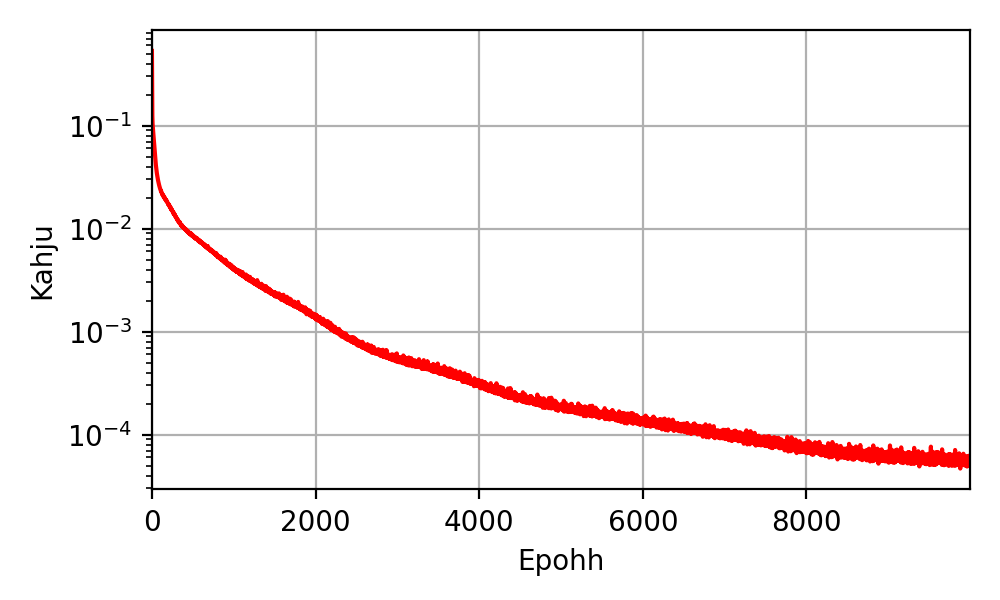

In [99]:
def plot_loss(loss):
    figure(figsize=(5,3))
    plot(loss, 'r-')
    yscale('log')
    xlim(0, len(loss) - 1)
    xlabel('Epohh')
    ylabel('Kahju')
    grid()
    tight_layout()
    show()

plot_loss(model.loss_curve_)

<IPython.core.display.Javascript object>


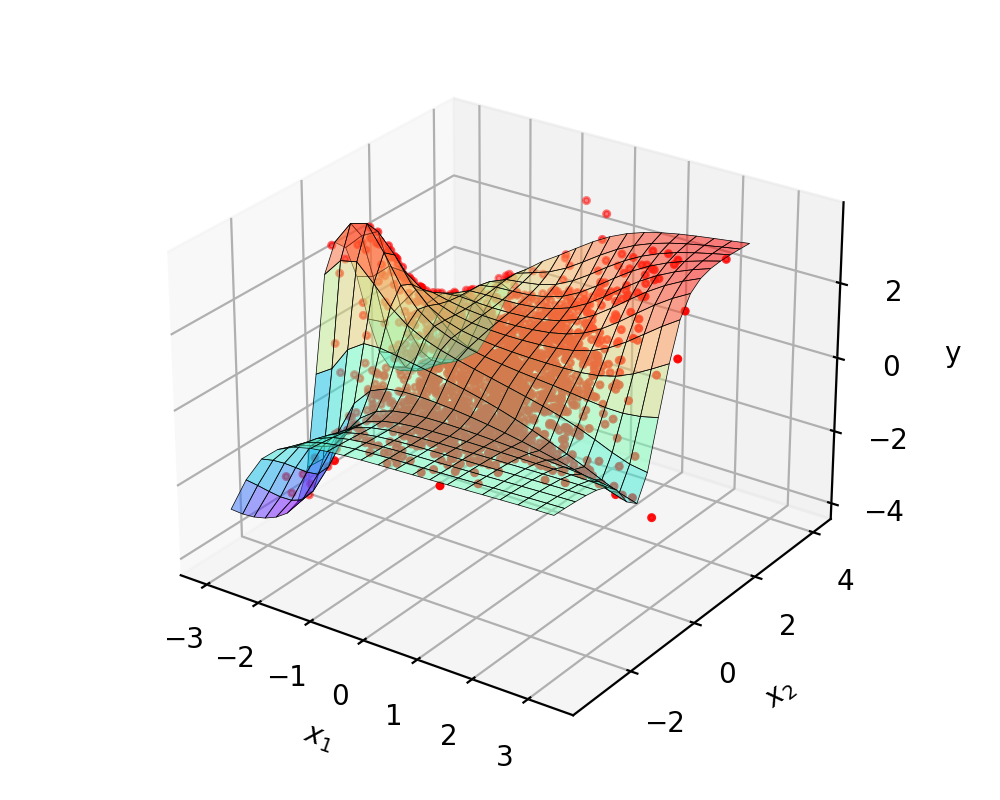

In [100]:
surface = create_surface(model.predict, -3, 3, -3, 3)
plot_3d(X_all_norm, y_all, surface, view=(20, -54))

In [101]:
print('Koefitsiendid =')
for ξ in model.coefs_:
    print(ξ, end='\n\n')

print('Vabaliikmed =')
for ξ in model.intercepts_:
    print(ξ)

Koefitsiendid =
[[-4.48319404e-01 -1.40029907e-01 -6.61459478e-01 -7.24004898e-04
  -4.09170299e-01  8.17050304e-01  7.60055649e-01]
 [-1.41604456e+00  2.05746494e+00 -6.71151791e-01 -1.53461140e+00
   2.53810862e-01  9.01143791e-01 -2.76964741e-01]]

[[-1.08465318 -0.09473108 -0.02509523 -1.16561222]
 [-0.44534863 -0.68280863 -1.38990878 -1.15764657]
 [ 1.36035607  0.55288129 -0.21156739  0.49021846]
 [ 0.61589187  1.77453823 -0.07926726  0.68915042]
 [ 1.12465538 -1.52412805  0.41149684  0.29743614]
 [ 1.49986904  0.55248766  0.18866784 -0.2557678 ]
 [-1.0467273   0.60294954 -3.11021522  0.97370162]]

[[-2.42363651]
 [-0.45019511]
 [-1.81338614]
 [-2.8032874 ]]

Vabaliikmed =
[-0.43814515  0.78503556  1.59417626  0.27577979  1.62665425 -1.81984421
  1.9477352 ]
[-1.59806084 -0.7494511   0.66704778  0.16199764]
[-1.02812964]


## Regressioon (TensorFlow)

TensorFlow paketis saab kasutaja masinõppe mudeli kõigis detailides ise ehitada, sh detailselt näidata, millised elemendid selles mudelis on treenitavad parameetrid, kuidas neid algväärtustada, kuidas on konstrueeritud kahjufunktsioon, jms. Mudeli ehitamisel kirjeldatakse TensorFlow objektide kaudu kogu arvutusahel (graaf). Reaalsed arvutused graafi järgi (sh treenimine) toimuvad spetsiaalse sessiooni käigus.

### Lineaarne regressioon

Lihtsaima stsenaariumi korral võib treenimiseks kasutatavad andmed kirjeldada konstantidena (`tf.constant`) juba graafi koosseisus. See tähendab paraku, et muude andmetega sama skeemi läbi arvutada ei saa. `tf.Variable`-tüüpi sõlmi käsitletakse mudeli vabade parameetritena. Graafi konstrueerimise ajal tuleb vaid anda nende algväärtused (mis võivad olla konstandid või saadud juhuslike arvude generaatoriga).

Sageli tunnuseid on palju ja mudelis sisaldub nende kaalutud summa (nagu eespool korduvalt demonstreeritud). Sellise arvutusmustri realiseerimisel on abiks `tf.matmul`, mis arvutab maatrikskorrutise. Näiteks lineaarse regressiooni mudeli saame kirja panna maatrikskujul nii, et arvutused toimuvad paralleelselt kõigi andmetega:
$$\vec y=\vec X\vec w+b.$$
Paraku `tf.matmul` eeldab, et mõlemad tensorid on vähemalt 2. järku, seega ka $\vec w$ tuleb defineerida maatriksina, kus teise mõõtme sihis on pikkus 1.

In [1152]:
import tensorflow as tf

graph = tf.Graph()
with graph.as_default():
    features = tf.constant(X_train_norm)
    labels = tf.constant(y_train)
    weights = tf.Variable(tf.zeros((n_features,1), dtype=tf.float64))
    bias = tf.Variable(0, dtype=tf.float64)
    predictions = tf.squeeze(tf.matmul(features, weights) + bias)
    loss = tf.losses.mean_squared_error(labels, predictions)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05)
    train_step = optimizer.minimize(loss)
    score = tf.reduce_mean(tf.abs(labels - predictions))    
    initializer = tf.global_variables_initializer()

Siin on valitud kõige lihtsam gradientlaskumise algoritm. Seejuures operatsioon `train_step` esindab vaid ühte iteratsiooni. Teatavasti gradientlaskumise korral parameetrite vektorit $\vec p$ uuendatakse järgmiselt:
$$\vec p_{t+1}=\vec p_t - \gamma \vec{\nabla}Q(\vec p_t),$$
kus $Q(\vec p)$ on kahjufunktsioon ja $\gamma$ on õpisamm (*learning rate*). Viimane on praegu ainus hüperparameeter ja on konstant. Kahjufunktsiooni väärtust esindab sõlm `loss`.

Mudeli optimeerimiseks jm arvutusteks tuleb luua spetsiaalne sessioon (`tf.Session`). Esmalt initsialiseeritakse muutujad ja seejärel luuakse tsükkel, kus korduvalt käivitatakse operatsioon `train_step`. Protsessi jälgimiseks võime igal iteratsioonisammul koguda või ekraanile trükkida kasulikku informatsiooni.

In [1154]:
with tf.Session(graph=graph) as sess:
    sess.run(initializer)
    for t in range(100):
        if t % 10 == 0: # iga 10 iteratsiooni järel
            print("epohh = %4d, kahju = %.5g" % (t, loss.eval()))
        sess.run(train_step)

    weights_value, bias_value, score_value = sess.run((weights, bias, score))

epohh =    0, kahju = 0.97162
epohh =   10, kahju = 0.34932
epohh =   20, kahju = 0.27374
epohh =   30, kahju = 0.26456
epohh =   40, kahju = 0.26345
epohh =   50, kahju = 0.26331
epohh =   60, kahju = 0.26329
epohh =   70, kahju = 0.26329
epohh =   80, kahju = 0.26329
epohh =   90, kahju = 0.26329


In [1156]:
print('keskmine viga = %.3f' % score_value)

keskmine viga = 0.291


In [1158]:
print('Koefitsiendid =', weights_value.squeeze(), '\nVabaliige =', bias_value)

Koefitsiendid = [-0.04770366  0.62215358] 
Vabaliige = 0.5644506508607918


### Neuronvõrk

Konstrueerime samasuguse neuronvõrgu nagu eelnevalt kasutatud `sklearn.neural_network.MLPRegressor`. Meil on kolm kihti (sh väljundkiht), mida karakteriseerivad kaalud `W1`, `W2`, `W3` ja vabaliikmed `B1`, `B2`, `B3`. Kaalud on maatriksid, kus piki ridu kulgevad sisendsignaalid ja piki veerge neuronid kihis. Vabaliikmed on vektorid, ja liitmise käigus rakenduvad *broadcast*-reeglid (nagu Numpy-s).

In [1159]:
N1, N2 = 4, 3 # neuronite arv esimeses ja teises peidetud kihis

graph = tf.Graph()
with graph.as_default():
    features = tf.placeholder(tf.float64, shape=(None, n_features))
    labels = tf.placeholder(tf.float64, shape=(None,))
    
    W1 = tf.Variable(tf.random.truncated_normal((n_features, N1), dtype=tf.float64))
    B1 = tf.Variable(tf.random.truncated_normal((N1,), dtype=tf.float64))
    W2 = tf.Variable(tf.random.truncated_normal((N1, N2), dtype=tf.float64))
    B2 = tf.Variable(tf.random.truncated_normal((N2,), dtype=tf.float64))
    W3 = tf.Variable(tf.random.truncated_normal((N2, 1), dtype=tf.float64))
    B3 = tf.Variable(tf.random.truncated_normal((), dtype=tf.float64))
    
    layer_out = tf.tanh(tf.matmul(features, W1) + B1)
    layer_out = tf.tanh(tf.matmul(layer_out, W2) + B2)
    predictions = tf.squeeze(tf.matmul(layer_out, W3) + B3)
    
    loss = tf.losses.mean_squared_error(labels, predictions)
    learning_rate = tf.placeholder(tf.float64, shape=())
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    train_step = optimizer.minimize(loss)
    initializer = tf.global_variables_initializer()
    
    # järgnev on vajalik R^2 arvutamise jaoks
    total_error = tf.reduce_sum(tf.square(labels - tf.reduce_mean(labels)))
    unexplained_error = tf.reduce_sum(tf.square(labels - predictions))
    score = 1 - unexplained_error / total_error

Stohhastilise gradientlaskumise jaoks vajalikud juhuslikud (aga etteantud suurusega) miniplokid (*mini-batches*) peame ise tekitama, näiteks sellise funktsiooniga:

In [102]:
def get_batches(x, y, batch_size):
    n_samples = len(x)
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    x = x[indices]
    y = y[indices]
    start = 0
    end = start + batch_size
    while end <= n_samples:
        yield x[start:end], y[start:end]
        start = end
        end += batch_size

In [1160]:
loss_hist = []

with tf.Session(graph=graph) as sess:
    sess.run(initializer)
    for t in range(2000):
        if t % 10 == 0:
            current_loss = loss.eval(feed_dict={features: X_train, labels: y_train})
            loss_hist.append(current_loss)
            print("epohh = %4d, kahju = %.5g" % (t, current_loss))

        for batch_x, batch_y in get_batches(X_train_norm, y_train, 32):
            sess.run(train_step,
                     feed_dict={learning_rate: 0.001, features: batch_x, labels: batch_y})
            
    score_train = score.eval(feed_dict={features: X_train_norm, labels: y_train})
    score_test = score.eval(feed_dict={features: X_test_norm, labels: y_test})
    surface = create_surface(lambda ξ: predictions.eval(feed_dict={features: ξ}), -3, 3, -3, 3)

epohh =    0, kahju = 9.0756
epohh =   10, kahju = 1.9285
epohh =   20, kahju = 0.67002
epohh =   30, kahju = 0.53727
epohh =   40, kahju = 0.48976
epohh =   50, kahju = 0.43792
epohh =   60, kahju = 0.35251
epohh =   70, kahju = 0.24459
epohh =   80, kahju = 0.18071
epohh =   90, kahju = 0.15686
epohh =  100, kahju = 0.1427
epohh =  110, kahju = 0.12576
epohh =  120, kahju = 0.10638
epohh =  130, kahju = 0.09262
epohh =  140, kahju = 0.084689
epohh =  150, kahju = 0.078894
epohh =  160, kahju = 0.074109
epohh =  170, kahju = 0.06917
epohh =  180, kahju = 0.064957
epohh =  190, kahju = 0.06075
epohh =  200, kahju = 0.057137
epohh =  210, kahju = 0.054108
epohh =  220, kahju = 0.051272
epohh =  230, kahju = 0.046475
epohh =  240, kahju = 0.042624
epohh =  250, kahju = 0.040532
epohh =  260, kahju = 0.040322
epohh =  270, kahju = 0.038423
epohh =  280, kahju = 0.037257
epohh =  290, kahju = 0.03651
epohh =  300, kahju = 0.035807
epohh =  310, kahju = 0.035538
epohh =  320, kahju = 0.0346

In [1161]:
print('Treeningandmed: R^2 = %.3f' % score_train)
print('Testandmed: R^2 = %.3f' % score_test)

Treeningandmed: R^2 = 0.998
Testandmed: R^2 = 0.997


<IPython.core.display.Javascript object>


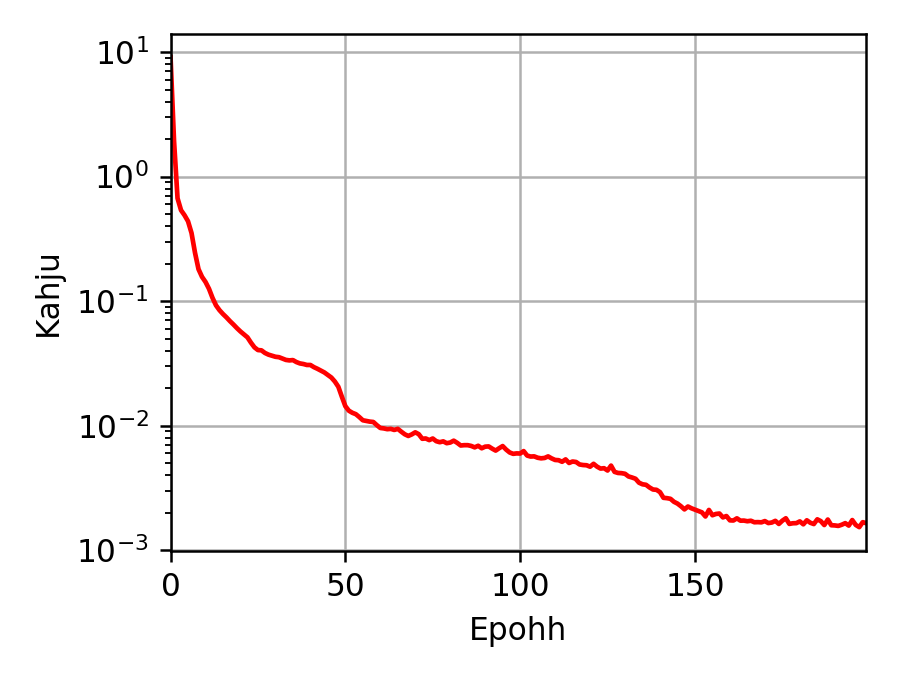

In [1162]:
plot_loss(loss_hist)

<IPython.core.display.Javascript object>


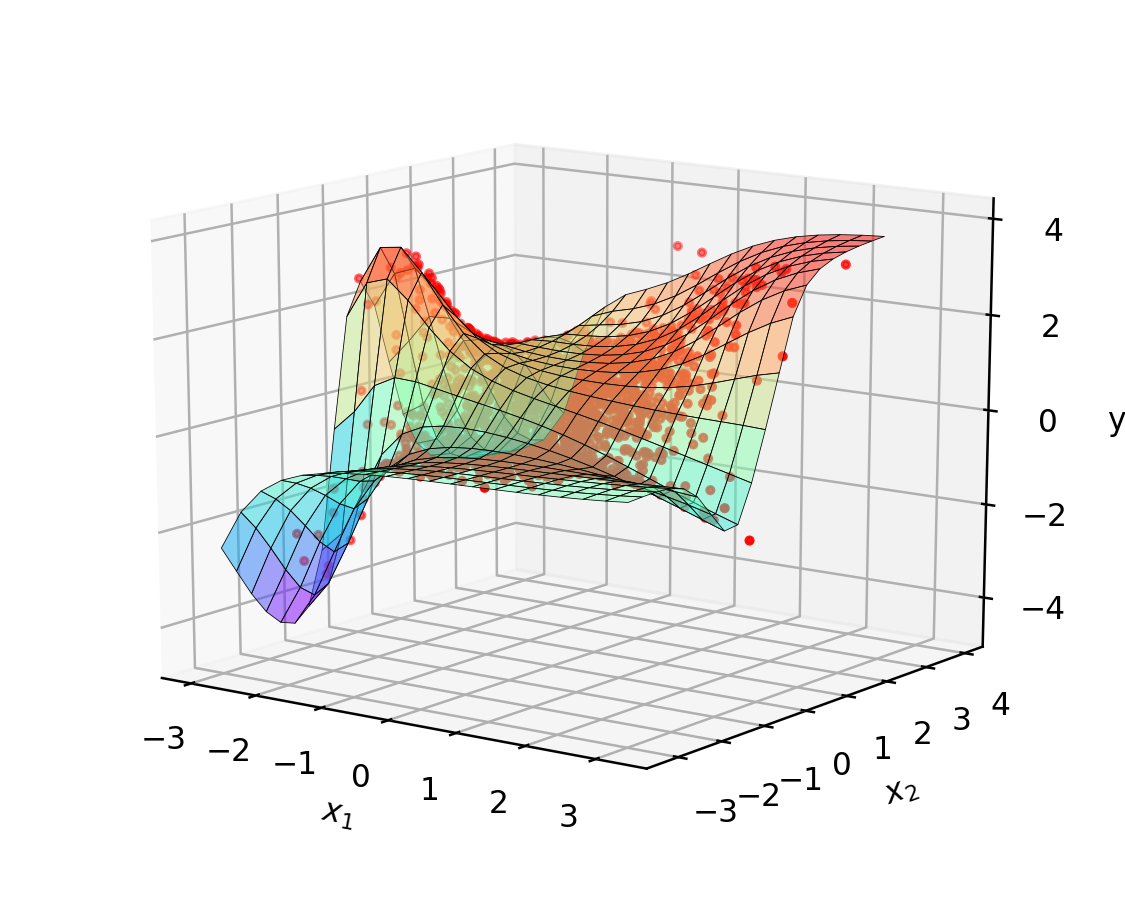

In [1163]:
plot_3d(X_all, y_all, surface, view=(15, -54))

## Klassifitseerimine (Scikit-Learn)

Teegis Scikit-Learn leidub hulganisti erinevaid klassifitseerimisalgoritme, näiteks:

- logistiline mudel (`sklearn.linear_model.LogisticRegression`)
- otsustuspuu `sklearn.tree.DecisionTreeClassifier`
- k-lähima naabri algoritm (`sklearn.neighbors.KNeighborsClassifier`)
- tugivektormasin (`sklearn.svm.SVC` või `sklearn.svm.LinearSVC`)
- otsustusmets (`sklearn.ensemble.RandomForestClassifier`)
- neuronvõrk (`sklearn.neural_network.MLPClassifier`)

Algoritmi valik sõltub andmete iseloomust ja mahust. Nende klasside kasutusmuster on üldjoontes sama ja sarnane regressiooni juhuga.

### k-lähima naabri algoritm

Vähese hulga andmete korral võib mõistlik olla k-lähima naabri algoritm (*k-nearest neighbor classifier*). Sel juhul kõik treeningandmed talletatakse ja nende baasil mingit üldistatud mudelit ei looda. Uue vaatluse klassifitseerimiseks otsitakse lihtsalt treeningandmete hulgast $k$ lähimat objekti, loendatakse kokku nende klassid, ja valituks osutub prevaleeriv klass. Tulemust mõjutab see, kuidas arvutatakse objektide vahelisi kauguseid tunnuste ruumis (parameetrid `metric` ja `p`). Samuti on mõeldav, et objekti kaal sõltub kaugusest (parameeter `weights`).

Näidisandmeteks võtame objektid, mida iseloomustab 2 tunnust ja mis jaotuvad 3 klassi:

<IPython.core.display.Javascript object>


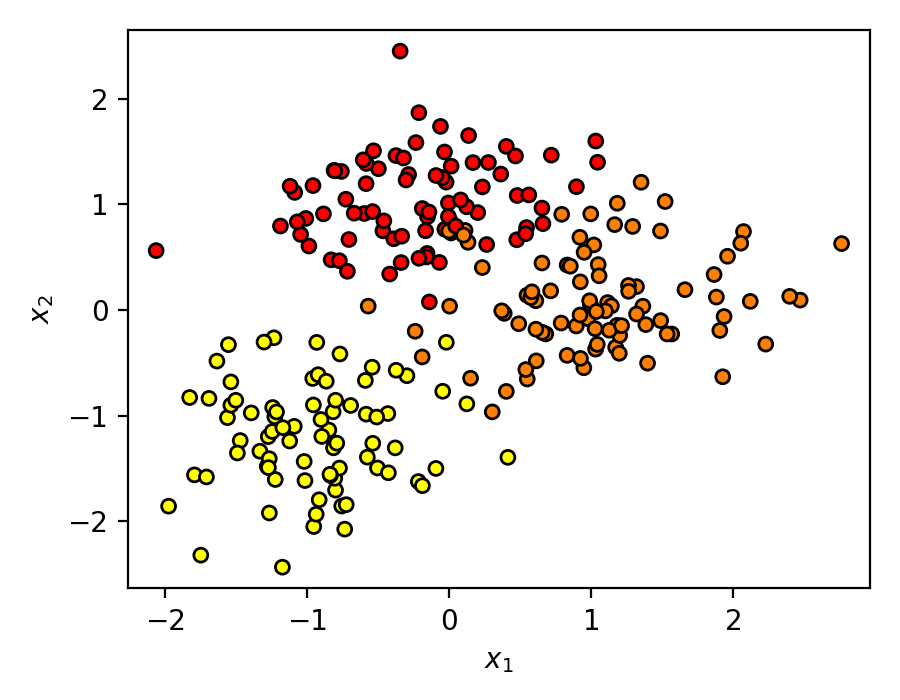

In [277]:
from sklearn.datasets import make_blobs

def plot_decision_surface(X, y, model=None, scaler=None, support=False, margin=0.2, alpha=1, resol=200, cmap=cm.autumn):
    x1, x2 = X[:, 0], X[:, 1]
    x1_min, x1_max = x1.min() - margin, x1.max() + margin
    x2_min, x2_max = x2.min() - margin, x2.max() + margin
    figure(figsize=(4.5,3.5))
    if model is not None:
        if scaler is None:
            f = model.predict
        else:
            f = lambda ξ: model.predict(scaler.transform(ξ))
        surface = create_surface(f, x1_min, x1_max, x2_min, x2_max, resol=resol)
        contourf(*surface, cmap=cmap, alpha=0.5)
    scatter(x1, x2, c=y, cmap=cmap, edgecolors='k', alpha=alpha)
    if support:
        sv = model.support_vectors_
        if scaler is not None:
            sv = scaler.inverse_transform(sv)
        scatter(sv[:,0], sv[:,1], edgecolors='k', s=200, lw=1, facecolors='none');
    xlim(x1_min, x1_max)
    ylim(x2_min, x2_max)
    xlabel('$x_1$')
    ylabel('$x_2$')
    tight_layout()
    show()

X_all, y_all = make_blobs(n_samples=500, n_features=2, centers=3, cluster_std=3.5, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size=0.5)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_all = scaler.transform(X_all)

plot_decision_surface(X_train, y_train)

Vektoris `y` on seekord diskreetsed märgendid, mis identifitseerivad objektiklassi (need ei pea olema tingimata täisarvud). 

Klassifitseerija treenimise käivitab endiselt meetod `fit`. Lihtsaim karakteristik klassifitseerija soorituse iseloomustamiseks on täpsus (*accuracy*), mis on õigete ennustuste ja katsete koguarvu suhe. Selle annab meetod `score`.

In [289]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=21)
model.fit(X_train, y_train)

print('Täpsus treeningandmete jaoks = %.3f' % model.score(X_train, y_train))
print('Täpsus testandmete jaoks = %.3f' % model.score(X_test, y_test))

Täpsus treeningandmete jaoks = 0.956
Täpsus testandmete jaoks = 0.932


Detailselt karakteriseerib klassifitseerija sooritust eksimismaatriks (*confusion matrix*). Selle $i$-s rida näitab, milline on $i$-ndasse klassi kuuluvate näidiste klassifitseerimistulemuste jaotus. Ideaalse soorituse korral oleks nullist erinevad vaid maatriksi diagonaalelemendid.

In [290]:
from sklearn.metrics import confusion_matrix

con_mat = confusion_matrix(y_test, model.predict(X_test))
print(con_mat)

[[76  9  0]
 [ 5 71  1]
 [ 1  1 86]]


Ilmselt täpsuse saab reprodutseerida eksimismaatriksi kaudu:

In [281]:
con_mat.trace() / con_mat.sum()

0.932

Kuvame nüüd koos treeningobjektidega ka vastava otsustuspinna (*decision surface*), kus värvusega näidatakse, millisesse klassi kuuluvaks osutuks vastava tunnusvektoriga objekt. Kuna antud mudeli kasutamine (st meetod `predict`) põhineb otsingul, on arvutus võrdlemisi aeganõudev.

<IPython.core.display.Javascript object>


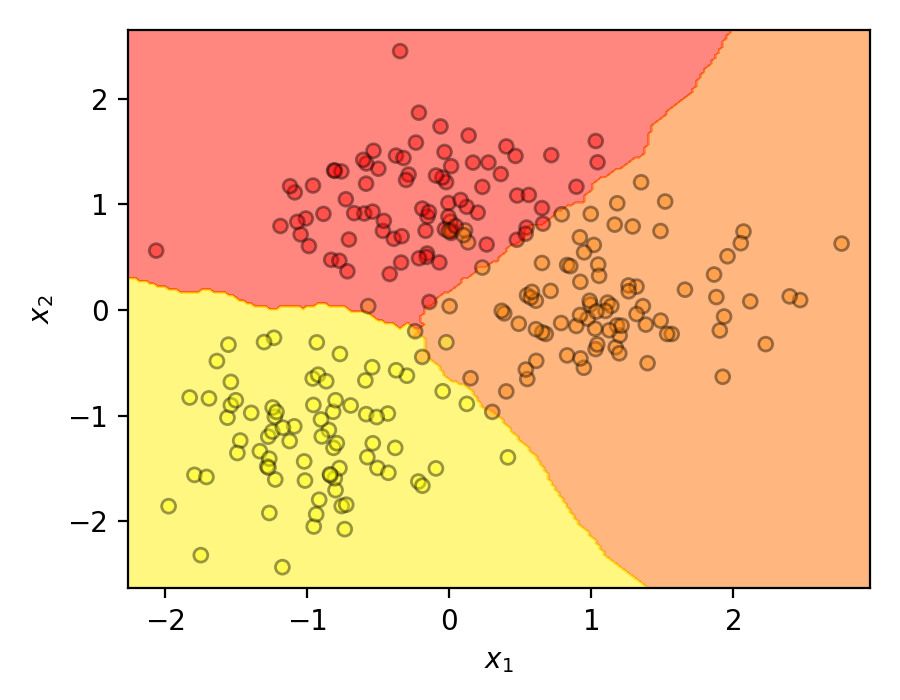

In [291]:
plot_decision_surface(X_train, y_train, model, alpha=0.4)

$k$ on sisuliselt selle mudeli hüperparameeter, ja seda tuleks timmida, et saavutada optimaalset sooritust. Selles näites sai võetud $k=21$, mis andis nende testandmete peal võrdlemisi hea tulemuse. Võrdleme seda juhuga, kus $k=1$:

Täpsus treeningandmete jaoks = 1.000
Täpsus testandmete jaoks = 0.908


<IPython.core.display.Javascript object>


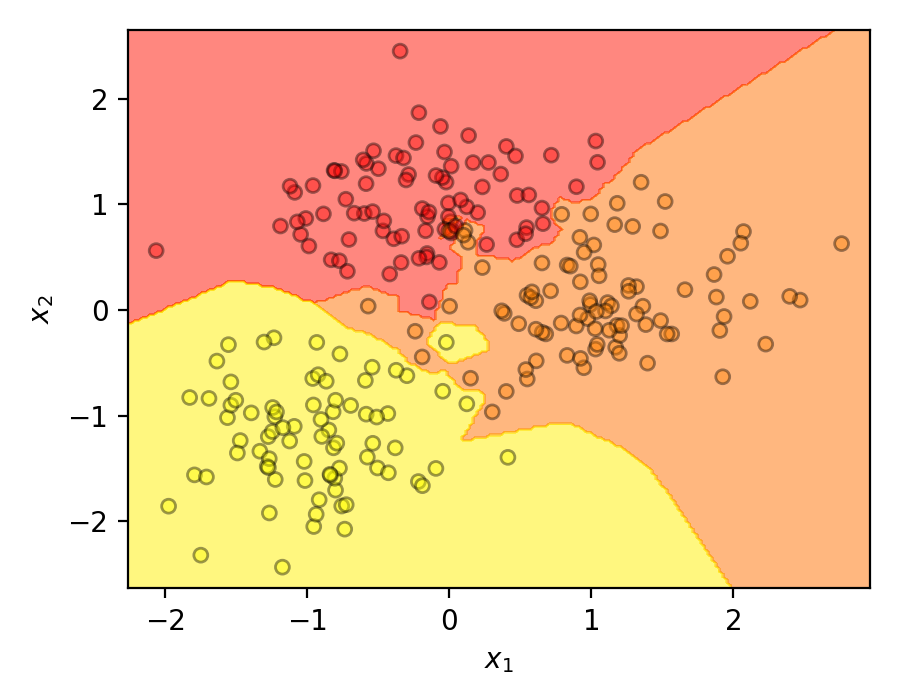

In [292]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

print('Täpsus treeningandmete jaoks = %.3f' % model.score(X_train, y_train))
print('Täpsus testandmete jaoks = %.3f' % model.score(X_test, y_test))

plot_decision_surface(X_train, y_train, model, alpha=0.4)

Nüüd treeningandmete puhul saavutati paratamatult maksimaalne täpsus, kuid saadud mudel ei üldistu enam nii hästi. See avaldub selles, et eraldusjooned/otsustuspinnad on keerulisema kujuga ehk mudel võtab liialt arvesse erandlikke katsepunkte.

### Tugivektormasin

Lineaarse klassifitseerimise baasidee on eraldada erinevad klassid tunnuste ruumis sobiva hüperpinnaga. Binaarse klassifitseerimise korral tähendaks see selliste kaalude $w_i$ ja vabaliikme $b$ leidmist, et kui tunnusvektori $\vec x$ korral $\sum w_ix_i+b > 0$, siis loetakse vastav objekt kuuluvaks ühte klassi, vastasel korral teise klassi. Lineaarse klassifitseerija treenimiseks leidub erinevaid algoritme.

Tugivektormasina korral leitakse nimetatud eralduspind nii, et see asuks lähimatest andmepunktidest võrdsel kaugusel. Eristatakse kõva ja pehme äärega tugivektormasinaid. Esimesel juhul eeldatakse, et klassid on võimalik hüpertasandiga täielikult eraldada, teisel juhul saab algoritmi treenida ka kattuvuse korral. Seda kontrollitakse mittenegatiivse seadistusparameetriga $C$. Võttes $C$ piisavalt suure, saame maksimaalse marginaali eralduspinna ümber (tühja ala esimeste objektideni). Seega õigel pool eraldustasandit, kuid väljaspool marginaali asuvaid vaatlusi praktiliselt ei arvestata.

Täpsus treeningandmete jaoks = 1.000
Täpsus testandmete jaoks = 0.980


<IPython.core.display.Javascript object>


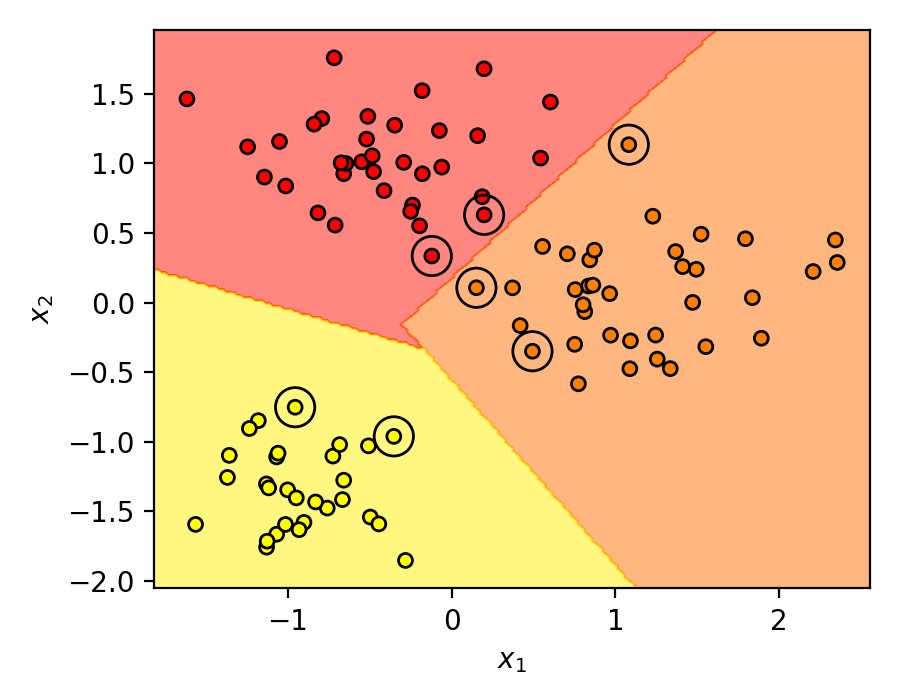

In [297]:
from sklearn.svm import SVC

X_all, y_all = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=2.6, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size=0.5)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_all = scaler.transform(X_all)

model = SVC(kernel='linear', C=1e6)
model.fit(X_train, y_train)

print('Täpsus treeningandmete jaoks = %.3f' % model.score(X_train, y_train))
print('Täpsus testandmete jaoks = %.3f' % model.score(X_test, y_test))
plot_decision_surface(X_train, y_train, model, support=True)

Järgmine näide kujutab objekte, mille eraldamiseks lineaarne klassifitseerija enam ei sobi.

<IPython.core.display.Javascript object>


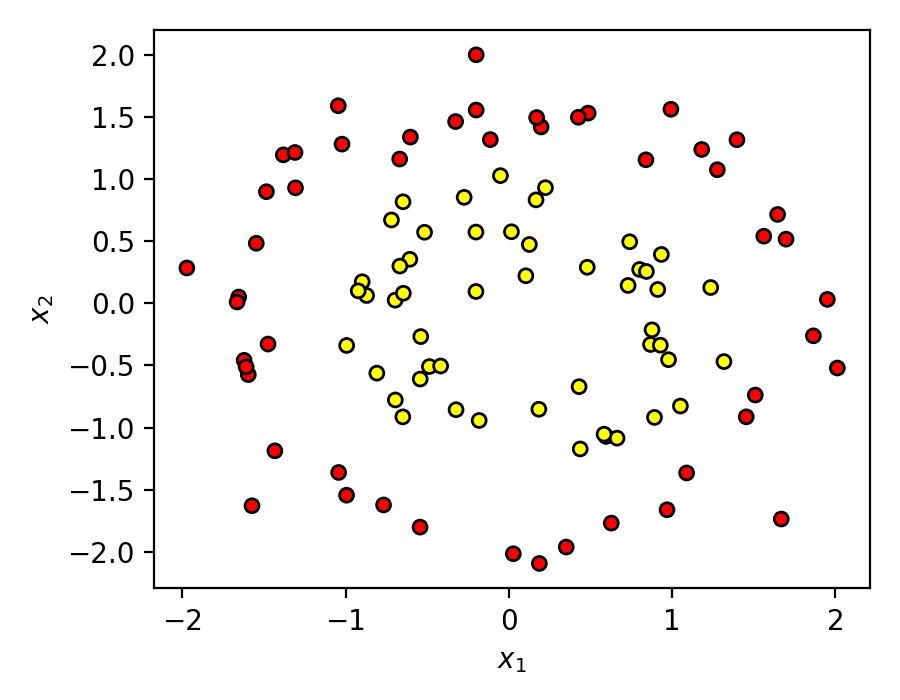

In [298]:
from sklearn.datasets import make_circles

X_all, y_all = make_circles(n_samples=200, factor=0.5, noise=0.1, random_state=2)

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size=0.5)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_all = scaler.transform(X_all)

plot_decision_surface(X_train, y_train)

Kasutades sobivat tuuma (*kernel*), saab tunnuseid laiendada kõrgema dimensiooniga ruumi, kus eeldatavasti klassid eralduvad.

Täpsus treeningandmete jaoks = 1.000
Täpsus testandmete jaoks = 0.990


<IPython.core.display.Javascript object>


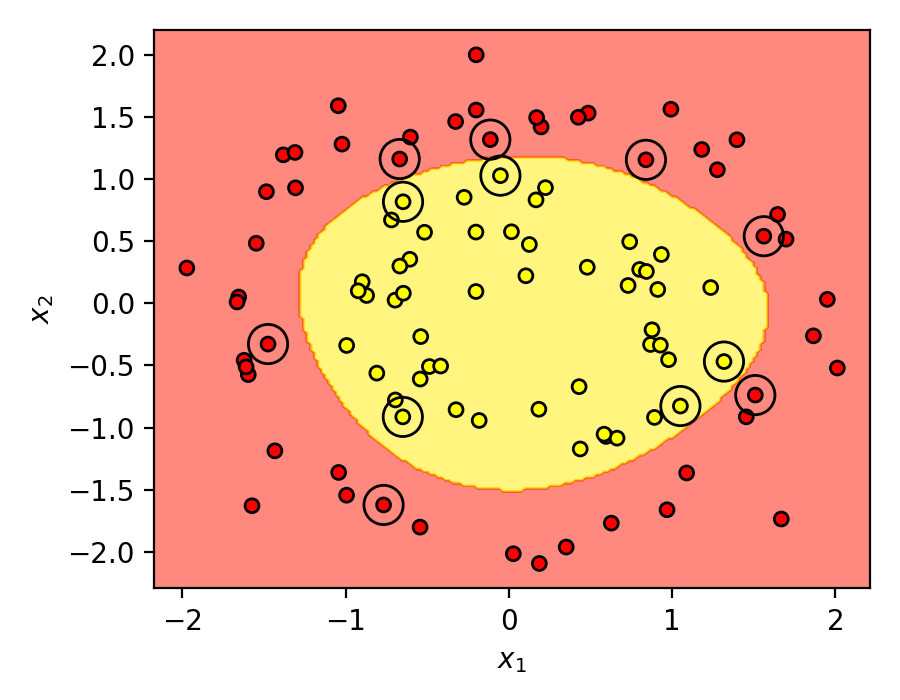

In [300]:
model = SVC(kernel='rbf', gamma='scale', C=1e6)
model.fit(X_train, y_train)

print('Täpsus treeningandmete jaoks = %.3f' % model.score(X_train, y_train))
print('Täpsus testandmete jaoks = %.3f' % model.score(X_test, y_test))
plot_decision_surface(X_train, y_train, model, support=True)

### Neuronvõrk

Olgu meil masinõppe mudel, mis sisendisse antud tunnuste komplekti $\vec x$ jaoks arvutab väljundsuuruse $z$, mis võib omandada mistahes väärtust vahemikus $(-\infty, \infty)$. Viimase saab teisendada suuruseks $p$ vahemikus $(0, 1)$ logistilise funktsiooni abil:
$$p=\frac{e^z}{1+e^z}$$
Kui tegemist on binaarse klassifitseerimisülesandega, siis saadud suurust võib tõlgendada kui tõenäosust, nii et klassifitseerimise tulemuse määrab see, kas $p < 0{,}5$ või $p > 0{,}5$. Kui objektiklasse on $N$ ja mudel annab samuti välja $N$ reaalarvu $z_1,z_2,\ldots,z_N$, siis võime tõenäosused arvutada nn softmax-funktsiooni abil:
$$p_k=\frac{e^{z_k}}{\sum_k e^{z_k}}$$
Ilmselt $\sum_k p_k=1$. Valituks osutub klass, mille tõenäosus on suurim.

Sellise probleemiasetuse korral ei saa ilmselt kasutada sama kahjufunktsiooni nagu regressiooni korral. Selle asemel kasutatakse ristentroopia mõistet. Kui vaatlusele vastav klass on $k$ ja mudel ennustab selle tõenäosuseks $p_k$, siis kahjufunktsiooni lisandub panus $-\log p_k$. Näiteks, kui $p_k$ on väike, siis kahju saab olema suur.

Lihtsaim seda laadi binaarne klassifitseerija oleks pertseptron, kus $z=\vec w\vec x + b$. See oleks ühtlasi lineaarne klassifitseerija (nagu on ka tugivektormasin). Suurema õppimisvõimega universaalse klassifitseerija saab realiseerida tehisnärvivõrgu baasil, mille ehitust sai kirjeldatud eespool. Scikit-Learn teegis realiseerib selle `MLPClassifier`. Selle väljundis ongi softmax-funktsioon ja kahjufunktsiooniks on ristentroopia. Rakendame seda viimati vaadeldud andmetele.

In [365]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(5,), batch_size=8, learning_rate_init=0.0005,
                      max_iter=200, activation='relu', solver='adam', alpha=0.01,
                      n_iter_no_change = 10000, warm_start=True, random_state=42)

In [366]:
print('%6s %11s %8s' % ('Epohh', 'Treening', 'Test'))
for n in range(10):
    model.fit(X_train, y_train)
    print('%6d %11.3f %8.3f' % (
        len(model.loss_curve_),
        model.score(X_train, y_train),
        model.score(X_test, y_test)))

 Epohh    Treening     Test


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


   200       0.900    0.840
   400       0.910    0.900
   600       0.960    0.920
   800       0.970    0.960
  1000       0.990    0.990
  1200       1.000    0.990
  1400       1.000    0.990
  1600       1.000    1.000
  1800       1.000    1.000
  2000       1.000    1.000


<IPython.core.display.Javascript object>


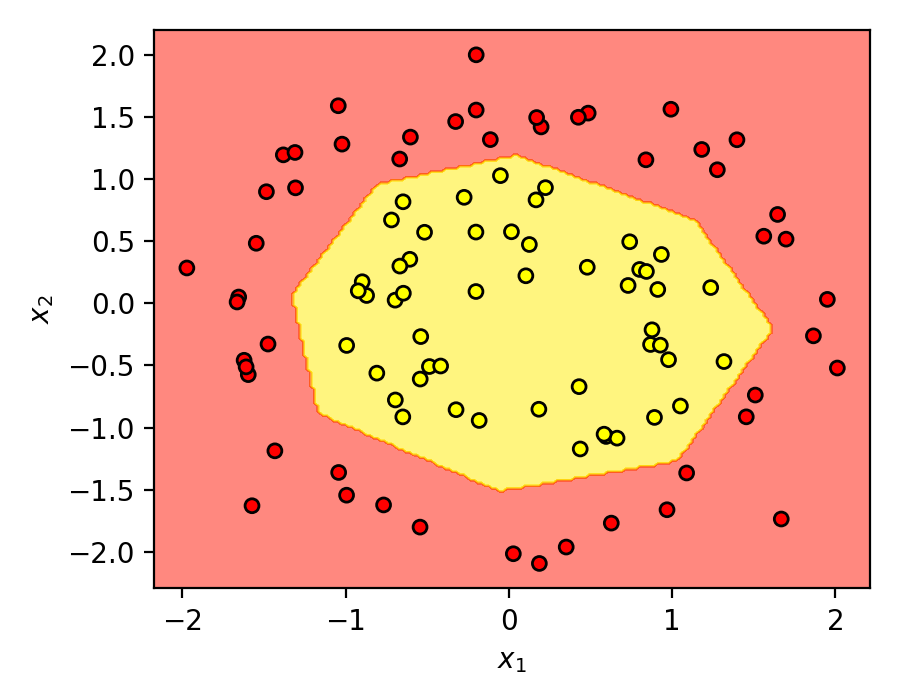

In [367]:
plot_decision_surface(X_train, y_train, model)

## Pildituvastus

Masinõppe üks konkreetne rakendus on pildituvastus (*image recognition*). Funktsiooniga `sklearn.datasets.load_digits` saab laadida näidisandmestiku käsitsi kirjutatud numbritega. Selles sisaldub ligi 1800 halltoonis kujutist suurusega 8x8 pikslit.

<IPython.core.display.Javascript object>


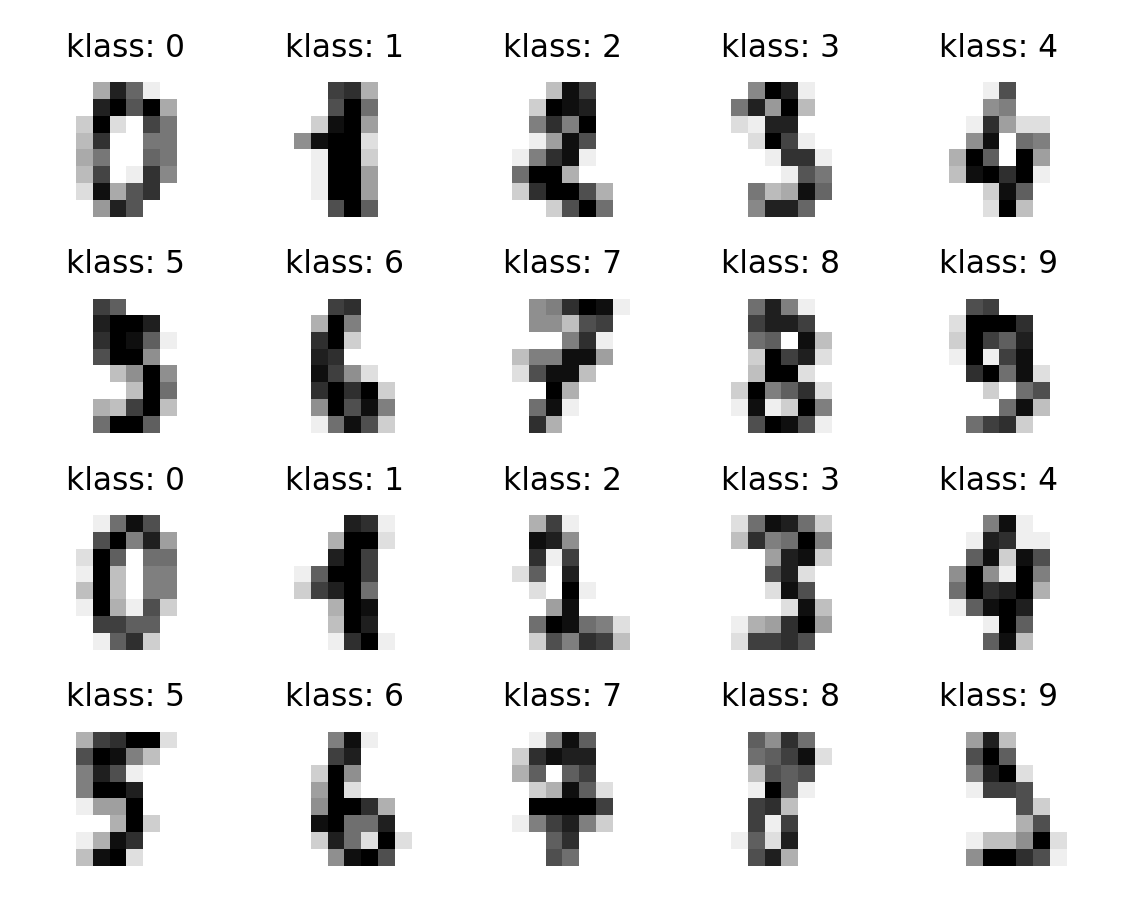

In [1117]:
from sklearn.datasets import load_digits

def show_images(images, labels, rows, cols):
    fig, axes = subplots(rows, cols, figsize=(5, 4))
    for ax, image, label in zip(axes.ravel(), images, labels):
        ax.set_axis_off()
        ax.matshow(image, cmap=cm.gray_r)
        ax.set_title('klass: %s' % str(label))

    tight_layout()
    show()

digits = load_digits()
show_images(digits.images, digits.target, 4, 5)

Klassifitseerimiseks on tarvis defineerida tunnusvektor. Lihtsaim lahendus on võtta tunnusteks otseselt kõigi 64 piksli heledused, mis tuleb koondada kindlas järjestuses ühte vektorisse.

In [1121]:
n_samples = len(digits.images)
X_all = digits.images.reshape(n_samples, -1)
y_all = digits.target

Edasine arvutusskeem on sarnane eelnenuga.

In [1119]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size=0.7)

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)
X_all_norm = scaler.transform(X_all)

model = SVC(kernel='rbf', gamma='scale')
model.fit(X_train_norm, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Nüüd saab mitmesugusel viisil väljendada mudeli täpsust. Seejuures, kuna tunnusvektor sisaldab kõiki piksleid, siis `reshape` meetodiga saame vajadusel ka algkujutised taastada.

<IPython.core.display.Javascript object>


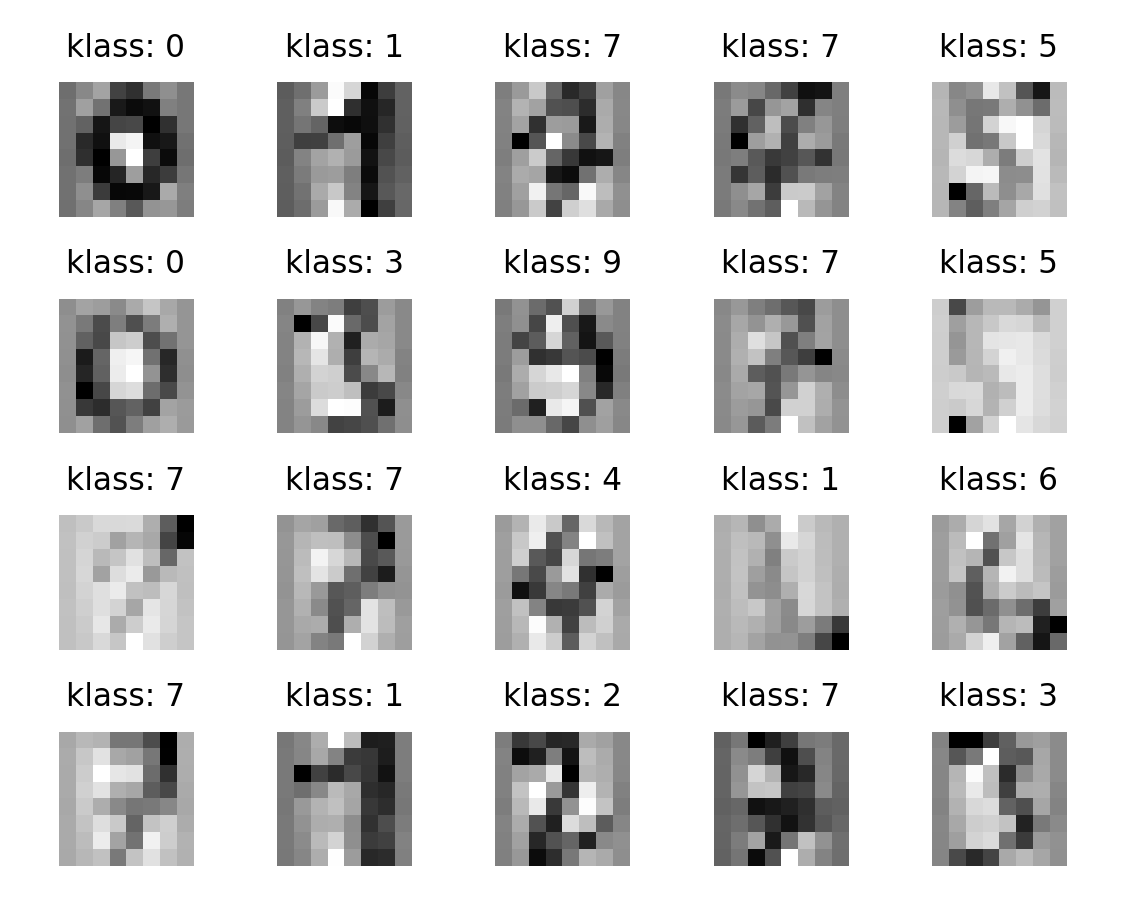

In [1120]:
show_images(X_test.reshape(-1, 8, 8), model.predict(X_test_norm), 4, 5)

In [1122]:
confusion_matrix(y_test, model.predict(X_test_norm))

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 47,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 57,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 51,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 59,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 54,  0,  0,  1,  2],
       [ 0,  0,  0,  0,  0,  1, 58,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 59,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 47,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 55]], dtype=int64)

In [1123]:
model.score(X_test_norm, y_test)

0.9851851851851852